<a href="https://colab.research.google.com/github/Melissa-k/oc_projet06/blob/main/KOUASSI_Melissa_4_presentation_102022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT 06 : Améliorez le produit IA de votre start-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
import os
ROOT_DIR = "/content/drive/MyDrive/OpenClassrooms/PROJET_06/"
sys.path.append(ROOT_DIR) 
src_path = os.path.abspath(os.path.join(ROOT_DIR,"helpers/"))
if src_path not in sys.path:
    sys.path.append(src_path)

# Helper functions
import helpers.data as data_utils

# data savings
if not os.path.exists(ROOT_DIR + "data/processed/"):
    os.mkdir(ROOT_DIR + "data/processed/")
# figures saving
if not os.path.exists(ROOT_DIR + "figures/"):
    os.mkdir(ROOT_DIR + "figures")
# result saving
if not os.path.exists(ROOT_DIR + "results/"):
    os.mkdir(ROOT_DIR + "results")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import random
import logging
import glob
#import os
#import sys

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

"""# Append source directory to system path
data_directory = "file:///media/mel2berah/DATA/formations/OC/ingenieur_ia/PROJET_06/"
src_path = os.path.abspath(os.path.join(data_directory,"helpers/"))
if src_path not in sys.path:
    sys.path.append(src_path)

# Helper functions
import helpers.data as data_helpers"""

# Visualisation modules
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

filename = ROOT_DIR  + "data/yelp_academic_dataset_review.json"

In [ ]:
reviews_df = pd.DataFrame()
list_processed_data = glob.glob(ROOT_DIR+"data/processed/reviews_*.csv")
if len(list_processed_data)>0:
    for dataPath in list_processed_data:
        # Load academic data from pickle file
        logger.info(">>> Loading reviews from pickle file...")
        reviews_df = reviews_df.append(pd.read_csv(dataPath, encoding= 'utf-8'))
    
    #reviews_df = pd.read_pickle(ROOT_DIR+"data/processed/reviews_1.csv", compression='gzip')
    logger.info(f">>> OK : {len(reviews_df)} reviews loaded from pickle file.")

reviews_df
reviews_df.describe(include="all", datetime_is_numeric=True)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,6.715250e+05,671525,671525,671525,671525.000000,671525.000000,671525.000000,671525.000000,671525,671525
unique,NaN,671525,444309,66596,NaN,NaN,NaN,NaN,670286,670501
top,NaN,JrIxlS1TzJ-iCu79ul40cQ,_BcWyKQL16ndpBdggh2kNA,IkY2ticzHEn4QFn8hQLSWg,NaN,NaN,NaN,NaN,We went there tonight and wow it was possibly ...,2010-12-27 23:22:50
freq,NaN,1,157,1264,NaN,NaN,NaN,NaN,4,3
mean,2.082386e+06,NaN,NaN,NaN,1.349543,1.516521,0.421841,0.187899,NaN,NaN
std,1.482143e+06,NaN,NaN,NaN,0.476826,3.373286,1.299430,0.889118,NaN,NaN
min,5.000000e+00,NaN,NaN,NaN,1.000000,-1.000000,-1.000000,0.000000,NaN,NaN
25%,7.475950e+05,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.489504e+06,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN
75%,3.771582e+06,NaN,NaN,NaN,2.000000,2.000000,0.000000,0.000000,NaN,NaN


In [ ]:
import gc

X = reviews_df["text"]
y = reviews_df["stars"]


del reviews_df
gc.collect()


95

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk import word_tokenize #RegexpTokenizer, 
from nltk.corpus import stopwords#, wordnet
from nltk.stem import PorterStemmer#, WordNetLemmatizer
import spacy

nltk.download("stopwords")
nltk.download("punkt")
stopwords = set(stopwords.words("english"))
# Load the spacy model
nlp = spacy.load("en_core_web_sm")
# tokenizers
#tokenizer = RegexpTokenizer(r'\w+')

tokenizers = {
    "PorterStemmer": lambda text: [
        PorterStemmer().stem(token)
        for token in word_tokenize(text.lower())
        if token.isalpha() and token not in stopwords
    ],
    
    "SpaCy": lambda text: [
        token.lemma_
        for token in nlp(text.lower())
        if token.is_alpha and not token.is_stop
    ],   
}
vectorizers = dict()

for tokenizer_name, tokenizer in tokenizers.items():
    vectorizers[f"TfidfVectorizer + strip_accents + lowercase + stop_words + {{min,max}}_df + ngrams + {tokenizer_name}"
    ] = TfidfVectorizer(
        strip_accents="unicode",
        lowercase=True,
        stop_words=stopwords,
        max_df=0.9,
        min_df=0.01,
        ngram_range=(1, 3),
        tokenizer=tokenizer,
    )


vectorizers["TfidfVectorizer + strip_accents + lowercase + stop_words + {min,max}_df + ngrams"] = TfidfVectorizer(
        strip_accents="unicode",
        lowercase=True,
        stop_words=stopwords,
        max_df=0.9,
        min_df=0.01,
        ngram_range=(1, 3),
    )
vectorizers["TfidfVectorizer + strip_accents + lowercase + stop_words"] =  TfidfVectorizer(
        strip_accents="unicode",
        lowercase=True,
        stop_words=stopwords,
    )


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


def plot_top_words(model, feature_names, n_top_words, n_topics, title):
    n_cols = 5
    n_lines = int(np.ceil(min(n_topics, model.n_components) / n_cols))
    fig, axes = plt.subplots(n_lines, n_cols, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_[0:n_topics]):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

## Recherche des sujets de mécontentement des clients

*  LDA 


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


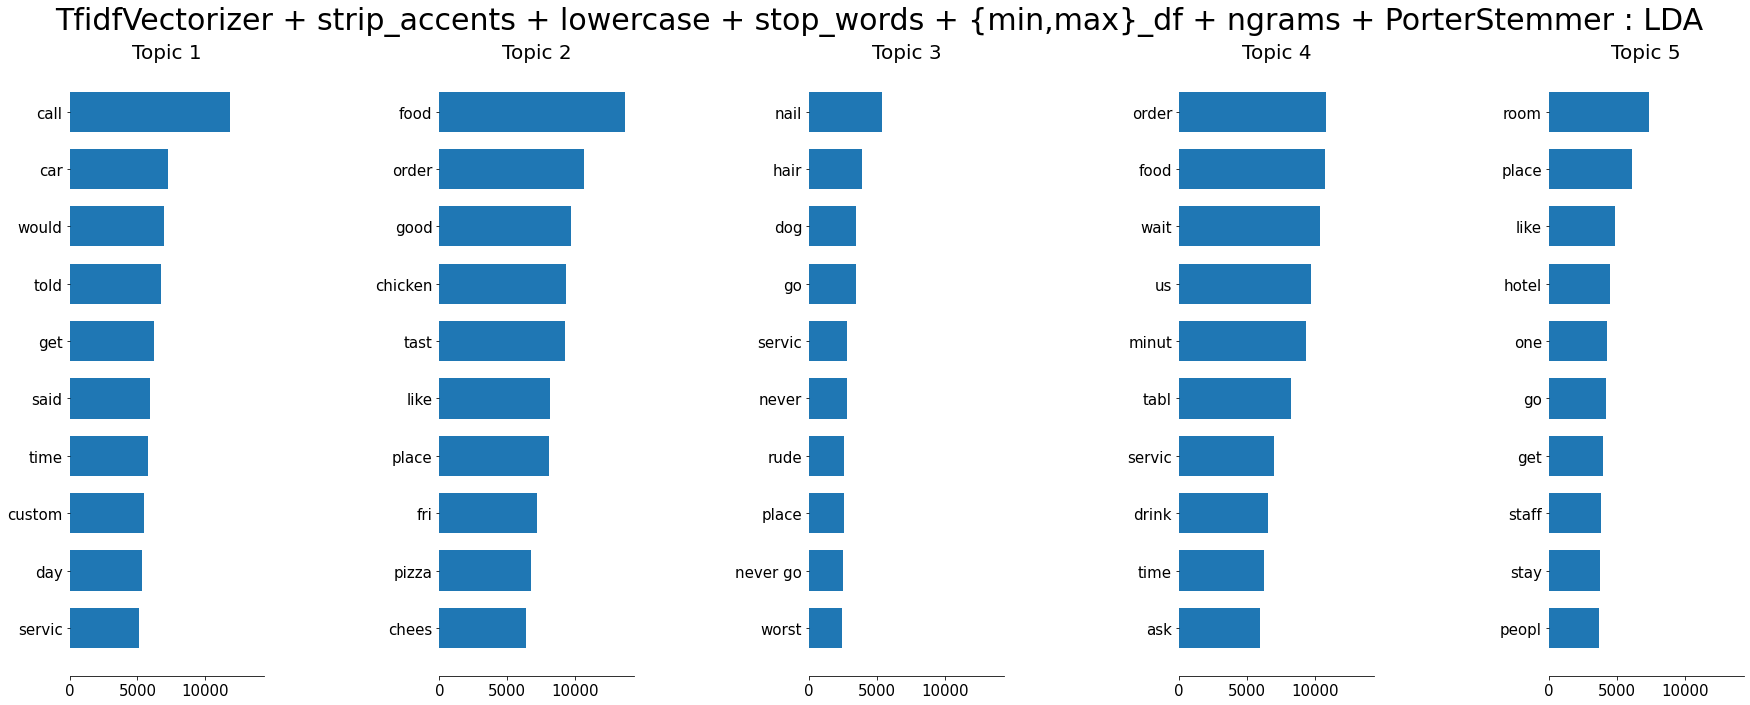

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['need', 'shall', 'win'] not in stop_words.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



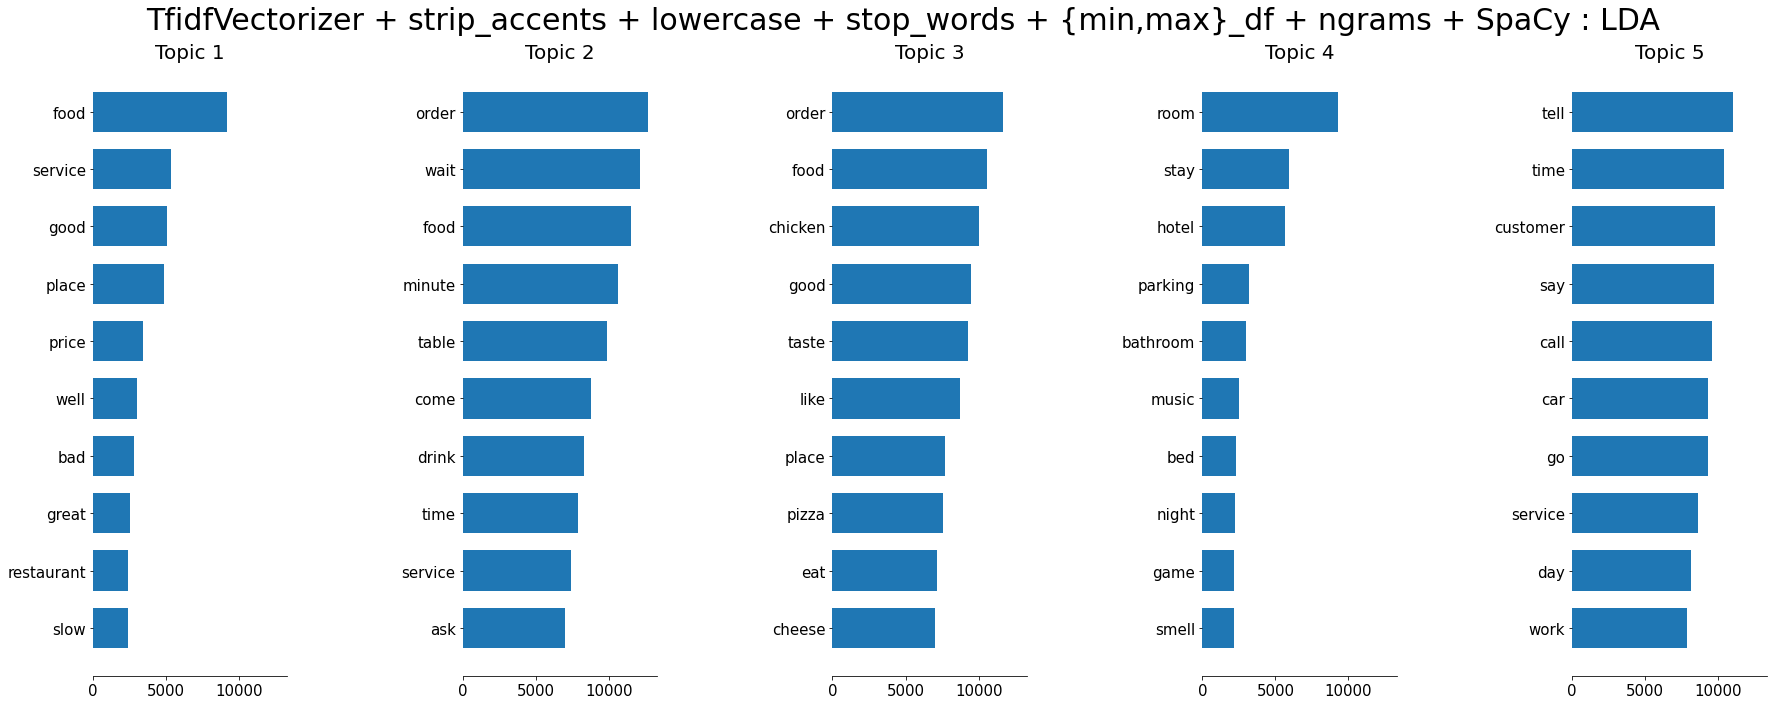

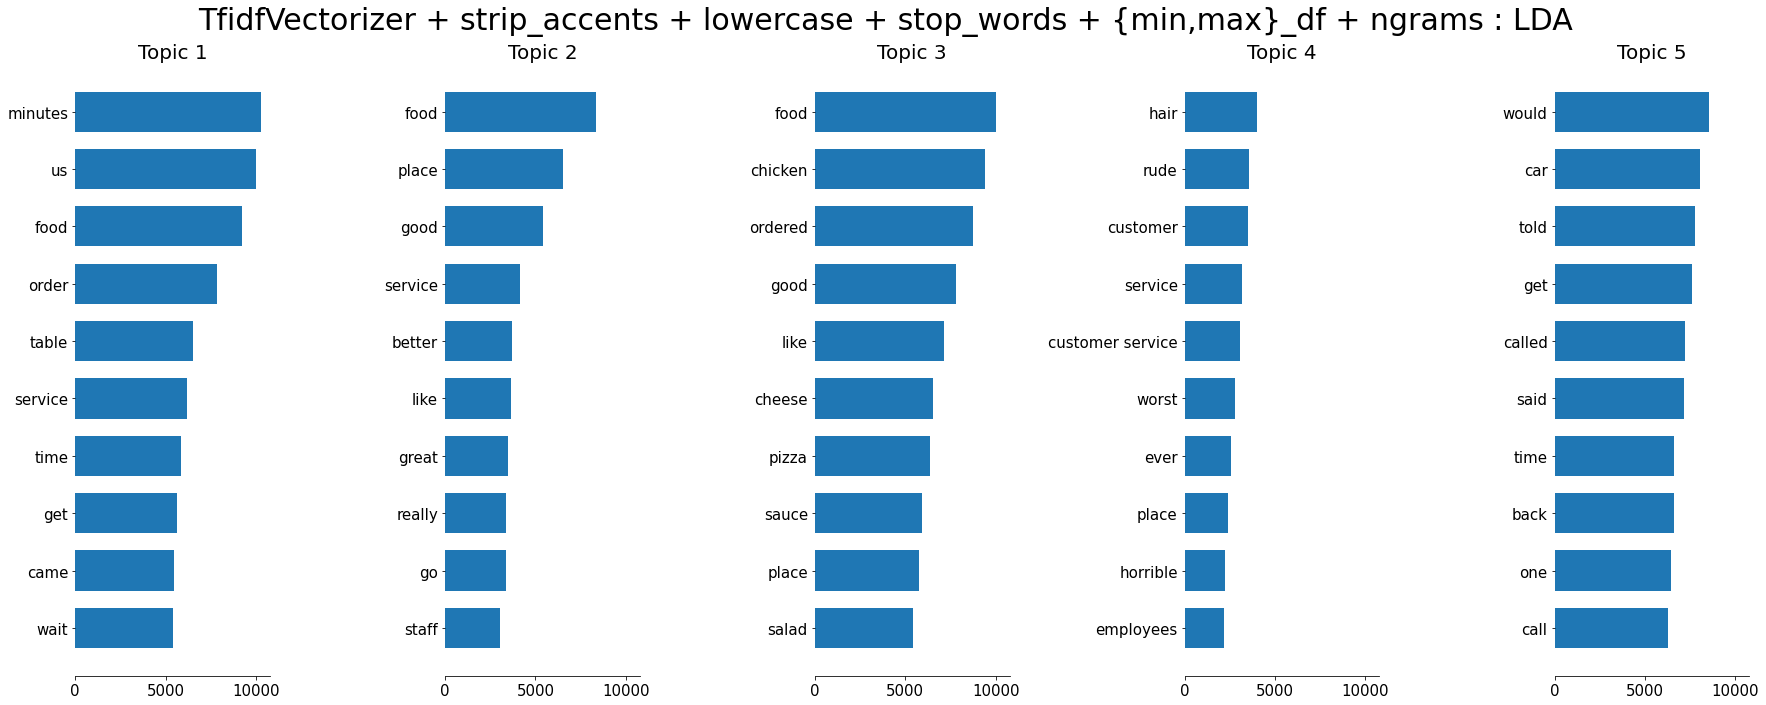

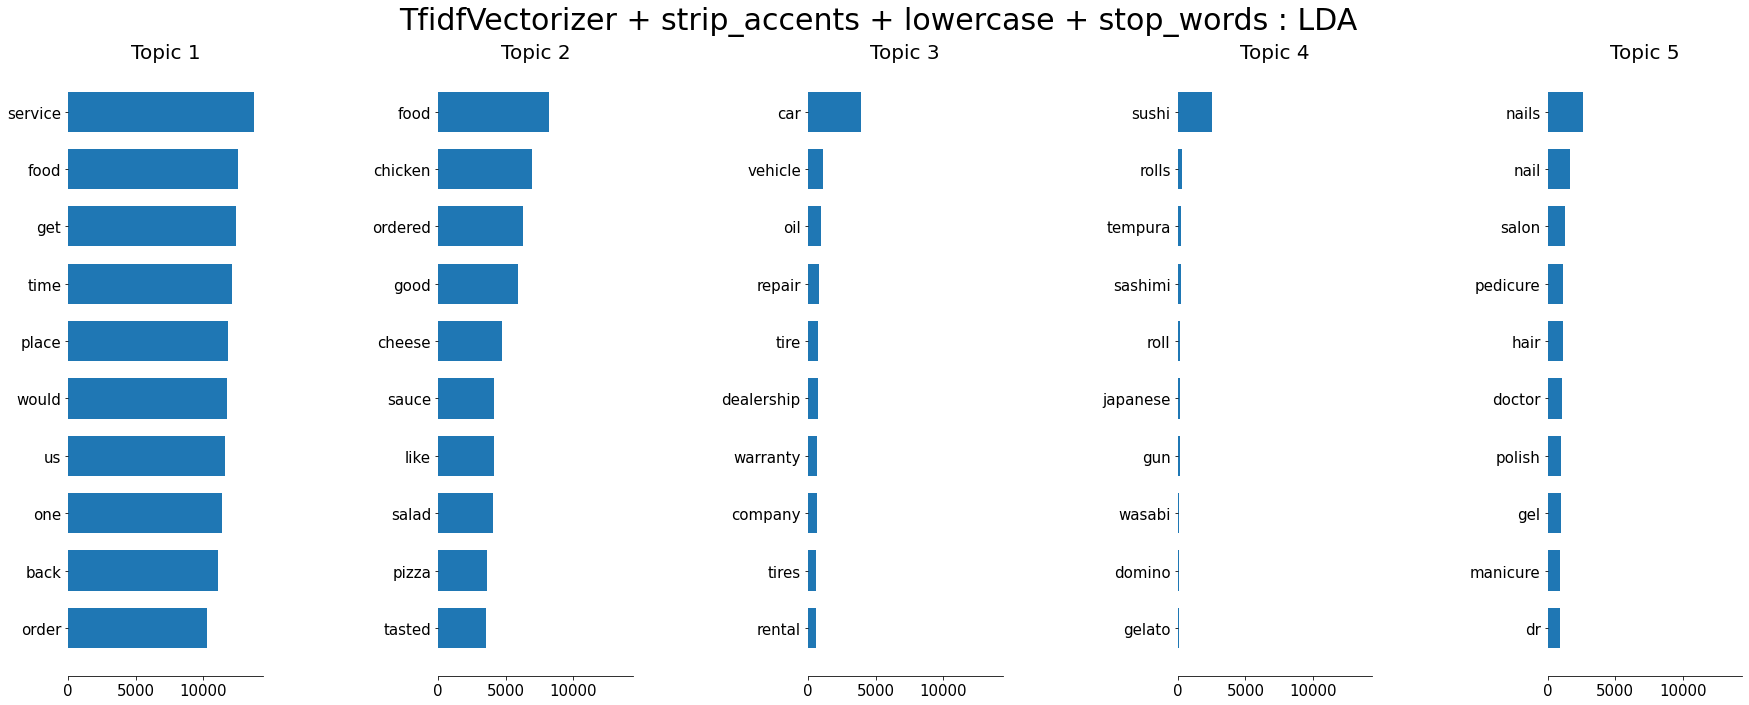

In [ ]:
words_count_df = pd.DataFrame()
top_20_count_dict = dict()
n_topics = 5
for vectorizer_name in vectorizers.keys():
    if ("TfidfVectorizer" not in vectorizer_name) :
        continue

    vectorizer = vectorizers[vectorizer_name]
    X_vec = vectorizer.fit_transform(X)

    words_count = pd.Series(
        X_vec.sum(axis=0).tolist()[0],
        index=vectorizer.get_feature_names(),
    )
    top_20_count = words_count.sort_values(ascending=False).head(20)

    words_count_df  = words_count_df.append(
        {
            "vectorizer_name": vectorizer_name,
            "words_count": words_count.sort_values(ascending=False).head(40),
        },
        ignore_index=True,
    )

    fig = px.bar(
        top_20_count,
        x=top_20_count.index,
        y=top_20_count.values,
        labels={"x": "Word", "y": "Count"},
        title=f"{vectorizer_name} : \nTop 20 frequent words in reviews (vocabulary = {len(words_count)} words)",
        color=top_20_count.values,
    )
    fig.show()

    # Créer le modèle LDA
    lda = LatentDirichletAllocation(
            n_components=n_topics, 
            max_iter=5, 
            learning_method='online', 
            learning_offset=50.,
            random_state=0).fit(X_vec)

    plot_top_words(
    model=lda,
    feature_names=vectorizer.get_feature_names_out(),
    n_top_words=10,
    n_topics=5,
    title=f"{vectorizer_name} : LDA",
    )

### Visualisation avec WORD CLOUD des mots représentatif du 1er "Topic"

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Preparation of the text
ll = list(words_count.sort_values(ascending=False).head(40).index)
li=ll[0]
for l in ll[1:]:
  li += " " + l
li

exclure_mots = ['would', 'could', 'might', 'must']
wordcloud = WordCloud(background_color = 'white',  max_words = 50).generate(li)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
mask = np.array(Image.open(ROOT_DIR + "data/cloud_pensee.png"))
mask[mask == 0] = 255

wordcloud = WordCloud(background_color = "white", stopwords = exclure_mots, max_words = 50, mask = mask).generate(li)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

In [ ]:
def couleur(*args, **kwargs):
    import random
    return "rgb(0, 100, {})".format(random.randint(100, 255))

mask = np.array(Image.open(ROOT_DIR + "data/cloud_pensee.png"))
mask[mask == 0] = 255    
plt.imshow(wordcloud.recolor(color_func = couleur))
plt.axis("off")
plt.show();

### Visualisation des mots représentatif de chaque topic

In [ ]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 46.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=02f4309ec4e0168a5a081797e4ef7630dd004faa16982230bee16fbf6b36fc0a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=31877bdaa7d008bd583682b09528a69a8b5d1f305dd9c79703b80f30aa6aeb37
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn


In [ ]:
from gensim.models import LdaModel, CoherenceModel, TfidfModel
from gensim.corpora import Dictionary

# Build the tokenized corpus
docs = X.map(tokenizers["PorterStemmer"])
dictionary = Dictionary(docs)

corpus = [dictionary.doc2bow(doc) for doc in docs]
tfidf = TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]

In [ ]:
# Compute the perplexity and coherence scores of the LDA model for diffenrent number of topics
results_lda = []
for num_topics in range(2, 7, 2):
  #num_topics=5
  # Build the LDA model
  lda = LdaModel(
      corpus=corpus_tfidf,
      id2word=dictionary,
      num_topics=num_topics,
      per_word_topics=True,
      passes=10,
      random_state=42,
  )

  # Compute the scores
  results = {
      "num_topics": num_topics,
      "perplexity": lda.log_perplexity(
          corpus
      ),  # Compute Perplexity (lower is better)
      "coherence": CoherenceModel(
          lda, texts=docs
      ).get_coherence(),  # Compute Coherence Score (higher is better)
  }
  results_lda.append(results)




In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(  # Plot perplexity
        x=pd.DataFrame(results_lda)["num_topics"],
        y=pd.DataFrame(results_lda)["perplexity"],
        name="Perplexity",
        mode="lines",
    ),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(  # Plot coherence
        x=pd.DataFrame(results_lda)["num_topics"],
        y=pd.DataFrame(results_lda)["coherence"],
        name="Coherence",
        mode="lines",
    ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="LDA Coherence and Perplexity",
    xaxis_title="Number of Topics",
    yaxis_title="Perplexity",
    yaxis2_title="Coherence",
)
fig.show()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models

lda = LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=5,
    per_word_topics=True,
    passes=10,
    random_state=42,
)


pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.235620 -0.021220       1        1  39.479374
1      0.259222 -0.018021       2        1  36.280691
5      0.240644  0.009237       3        1  16.675774
3     -0.196116  0.143667       4        1   3.163205
4     -0.259764  0.193701       5        1   2.919956
2     -0.279606 -0.307362       6        1   1.481000, topic_info=          Term           Freq          Total Category  logprob  loglift
476       room   57560.000000   57560.000000  Default  30.0000  30.0000
485       stay   44225.000000   44225.000000  Default  29.0000  29.0000
243      hotel   30537.000000   30537.000000  Default  28.0000  28.0000
1752      nail   26990.000000   26990.000000  Default  27.0000  27.0000
47        food  182098.000000  182098.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
301   eggplant    1903.648856    2281.842106   Topic6  -5.7945   4.0312
3759     gumbo    2658.530610    5354.956777   Topic6  -5.4605   3.5122
3134        lo    1706.954355    2300.442798   Topic6  -5.9036   3.9141
1715   spanish    1451.178500    1768.046952   Topic6  -6.0659   4.0150
186         la    1771.634432    6876.313679   Topic6  -5.8664   2.8563

[415 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3054      1  0.000713  acryl
3054      2  0.000713  acryl
3054      3  0.000356  acryl
3054      4  0.000356  acryl
3054      5  0.997229  acryl
...     ...       ...    ...
68        2  0.377783  would
68        3  0.123252  would
68        4  0.000009  would
68        5  0.000009  would
68        6  0.000009  would

[2202 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 4, 5, 3])

With this technique, we can identify the following topics :

-   Topic 1 : negative words + Restaurant ("food", "rude", "wait", "hour", "place", "busi", "never" ...)
-   Topic 2 : Positive word for food + negative words ("disappoint", "time", "wait", "great","taste", "Chicken","burger" ...)
-   Topic 3 : words reated to car / engine ("car", "tire", "oil", "dealership", "slowest", "brake", "repair", ...)
-   Topic 4 : probably different places ("museum", "theater","bakerie","dunkin", ...)
-   Topic 5 : probably related to animal ("dog", "hair", "gumbo", "cut", "stylist", "dentist", "cat","anim","vet", "pet" ...)

This technique is quite efficient and helps us to identify the topics of the reviews.

## Etude de faisabilité de la classification des images 

In [ ]:
import pandas as pd
import numpy as np
import random
import logging
import glob
#import os
#import sys

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# matplotlib and plotly for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go

filename = ROOT_DIR  + "data/sampled_photos_df.csv" 

In [ ]:
sampled_photos_df =  pd.read_csv(filename )
logger.info(f">>> OK : {len(sampled_photos_df)} photos loaded from JSON file.")

# Reduce memory usage
sampled_photos_df = data_utils.helpers.reduce_dataframe_memory_usage(sampled_photos_df)
sampled_photos_df.describe(include="all")

,Unnamed: 0,photo_id,business_id,caption,label,image_path,label_encoded
count,1250.00000,1250,1250,593,1250,1250,1250.00000
unique,NaN,1250,1169,540,5,1250,NaN
top,NaN,kMgM6hD2GU-1q79cRP4IWw,IkY2ticzHEn4QFn8hQLSWg,Menu,drink,kMgM6hD2GU-1q79cRP4IWw.jpg,NaN
freq,NaN,1,4,32,250,1,NaN
mean,101202.90640,NaN,NaN,NaN,NaN,NaN,2.00000
std,58350.96318,NaN,NaN,NaN,NaN,NaN,1.41478
min,116.00000,NaN,NaN,NaN,NaN,NaN,0.00000
25%,53116.00000,NaN,NaN,NaN,NaN,NaN,1.00000
50%,100563.50000,NaN,NaN,NaN,NaN,NaN,2.00000
75%,151461.00000,NaN,NaN,NaN,NaN,NaN,3.00000


#### Visualization of typical images of each class

OUTSIDE


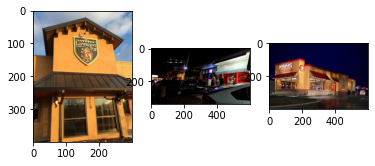

--------------------------------------------------- 

MENU


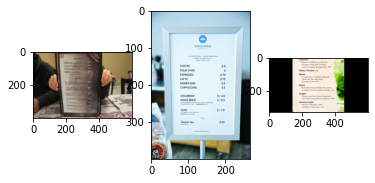

--------------------------------------------------- 

DRINK


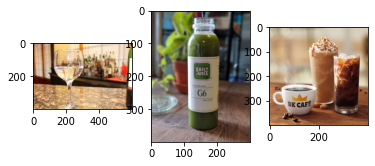

--------------------------------------------------- 

FOOD


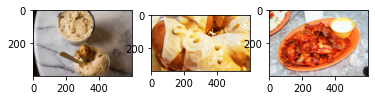

--------------------------------------------------- 

INSIDE


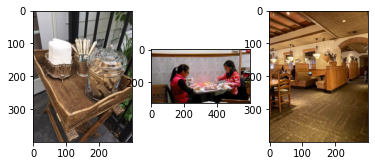

--------------------------------------------------- 



In [ ]:
from matplotlib.image import imread

dict_list_img_class = {}
for label in sampled_photos_df.label.unique():
    list_label = [list(sampled_photos_df.image_path)[i] for i in range(len(sampled_photos_df)) if list(sampled_photos_df.label)[i]==label]
    dict_list_img_class[label] = list_label

for label in dict_list_img_class.keys() :
    
    #print("--------------------------------------------------- \n")
    print(label.upper())
    list_label = dict_list_img_class[label]
    for i in range(3):
        plt.subplot(130 + 1 + i) 
        filename = os.path.join(ROOT_DIR  + "data/photos_dev/", f"{list_label[i+10]}")
        #print(filename)
        image = imread(filename)
        plt.imshow(image)
    plt.show()
    print("--------------------------------------------------- \n")


In [ ]:
px.histogram(
    sampled_photos_df,
    x="label",
    # color="label",
    histnorm="probability",
    title=f"Photos distribution by label (N={len(sampled_photos_df)})",
)

### Part 1 : **Visual features extraction** with Traditional Computer vision

In this section, we are going to try and predict the label of the photos.

To achieve this, we need to :

-   extract visual features from our dataset : 
    -   colors : RGB, HSV and LAB histograms of patches of the image
    -   shapes : gradient histograms of patches of the image (HOG features)
    -   keypoints : corners of objects detected in the image (ORB features)
-   definition of a vocabulary of "visual-words" : Clusters of visual features that are similar to each other
-   Bag of visual-words : representation of each photo as a vector of visual-words.

-   Data preparation​​
    -   Split the dataset into training and test sets (train_test_split)​​
    -   Scale the data (StandardScaler)​
    -   Reduce the dimensionality of the data (PCA)​​

-   Train a classifier to predict the label of the photo based on the bag of visual-words representation

### Visual features extraction

We are going to extract the following features :
- color features :
  - randomly pick 200 20x20 patches of the image
  - for each patch :
    - compute the RGB, HSV and LAB histograms of the patch with 5-bins per channel
    - => 3 vectors of size 5**3 = 125
  - => 600 vectors of size 125 per image
- shape features :
  - compute the Histogram of Gradients (HOG) of the image with :
    - blocks of 2x2 cells 
    - cells of 12x12 pixels 
    - 9 bins of gradient orientation per cell
  - => for an image of 240x480 : 19x39x4 = 2964 vectors of size 9
- keypoints features :
  - compute the 200 first ORB keypoints of the image
  - => 200 vectors of size 32 per image

In [ ]:
import cv2 as cv
from skimage.feature import hog
from sklearn.feature_extraction.image import extract_patches_2d

photos_features_df = pd.DataFrame()
for photo in sampled_photos_df.itertuples():
    if random.random() < 0.001:
        print(len(photos_features_df))

    img_path = os.path.join(ROOT_DIR  + "data/photos_dev/", f"{photo.photo_id}.jpg")
    img = cv.imread(img_path, flags=cv.IMREAD_COLOR)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_gray = cv.equalizeHist(img_gray)   # equalize image histogram

    color_descriptors = []
    for patch in extract_patches_2d( img, patch_size=(20, 20), max_patches=200, random_state=42, ):
        color_descriptors.append(
            cv.calcHist(
                [
                    cv.cvtColor(patch, cv.COLOR_BGR2RGB),
                    cv.cvtColor(patch, cv.COLOR_BGR2HSV),
                    cv.cvtColor(patch, cv.COLOR_BGR2LAB),
                ],
                [0, 1, 2],
                None,
                [5, 5, 5],
                [0, 256, 0, 256, 0, 256],
            ).flatten()
        )
    # HOG Features
    n_orientations = 9
    hog_features = hog(
        img_gray,
        pixels_per_cell=(10, 10),
        cells_per_block=(2, 2),
        orientations=n_orientations,
        transform_sqrt=True,
    )
    hog_descriptors = [
        hog_features[i : i + n_orientations]
        for i in range(0, len(hog_features), n_orientations)
    ]

    # ORB Features
    orb = cv.ORB_create(nfeatures=200)
    orb_keypoints = orb.detect(img_gray, None)
    orb_keypoints, orb_descriptors = orb.compute(img_gray, orb_keypoints)

    photos_features_df = photos_features_df.append(
        {
            "file_name": photo.photo_id,
            "label": photo.label,
            "color_descriptors": color_descriptors,
            "hog_descriptors": hog_descriptors,
            "orb_keypoints": orb_keypoints,
            "orb_descriptors": orb_descriptors,
        },
        ignore_index=True,
    )

photos_features_df.dropna(inplace=True)
photos_features_df

,file_name,label,color_descriptors,hog_descriptors,orb_keypoints,orb_descriptors
0,kMgM6hD2GU-1q79cRP4IWw,outside,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.18188016719631406, 0.12276565114627395, 0....","(< cv2.KeyPoint 0x7f5b4b9d3630>, < cv2.KeyPoin...","[[120, 177, 255, 112, 237, 221, 113, 87, 239, ..."
1,VB75GlozO9ZzkhQC8mY6Ag,menu,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.23343006622147536, 0.0, 0.0388376407445364...","(< cv2.KeyPoint 0x7f5b4b720c90>, < cv2.KeyPoin...","[[84, 125, 58, 110, 18, 198, 183, 113, 224, 12..."
2,9n5RobGsibyp8IriSszsSQ,menu,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.05040510114596375, 0.0, 0.0110313577075622...","(< cv2.KeyPoint 0x7f5b4b7232d0>, < cv2.KeyPoin...","[[230, 40, 250, 195, 213, 252, 242, 208, 67, 1..."
3,gdbkj2k7jczeLdYwdVBvCA,drink,"[[400.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[[0.16591448731233066, 0.19125837986598604, 0....","(< cv2.KeyPoint 0x7f5b4b6928d0>, < cv2.KeyPoin...","[[28, 201, 119, 95, 69, 202, 231, 232, 246, 12..."
4,ukQY-rcV4bHTNXZFcq0I-w,menu,"[[54.0, 56.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[[0.2589154090293024, 0.20434476818469394, 0.1...","(< cv2.KeyPoint 0x7f5b4b5efed0>, < cv2.KeyPoin...","[[8, 84, 215, 251, 115, 250, 176, 3, 190, 19, ..."
...,...,...,...,...,...,...
1245,b3OVp0yKlLKOZiPho_-fAA,outside,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.27457645776719636, 0.05014914484321725, 0....","(< cv2.KeyPoint 0x7f5b3db1ccf0>, < cv2.KeyPoin...","[[110, 112, 237, 65, 235, 127, 157, 157, 75, 2..."
1246,v-ijwKpgtdAqRLf8-BCTTQ,food,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.265953139462232, 0.18343813826046335, 0.26...","(< cv2.KeyPoint 0x7f5b1aa754e0>, < cv2.KeyPoin...","[[56, 141, 106, 253, 148, 167, 231, 119, 84, 3..."
1247,qXedooX3y7RVx5ufaloyfQ,menu,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]...","(< cv2.KeyPoint 0x7f5b1a952ae0>, < cv2.KeyPoin...","[[102, 181, 233, 72, 217, 91, 87, 170, 3, 228,..."
1248,wq2E-d6NuiCP5_DCC_6e6g,menu,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.15041415899618452, 0.07908174140747322, 0....","(< cv2.KeyPoint 0x7f5b1a8ed120>, < cv2.KeyPoin...","[[70, 3, 186, 196, 188, 22, 171, 21, 236, 141,..."


### Processing of color features

Building clusters of color features which are close to each other.

In [ ]:
# First, we need to create a dataset of color features.
color_features = [
    desc
    for photo_color in photos_features_df["color_descriptors"]
    for desc in photo_color
]
print(np.array(color_features).shape)

(250000, 125)


In [ ]:
# Now we need to prepare the color features for clustering, using standard scaling.

from sklearn.preprocessing import StandardScaler

color_scaler = StandardScaler().fit(color_features)
color_features_std = color_scaler.transform(color_features)

In [ ]:
# Define the hyperparameter : the number of clusters we want to find. 
# For that, we will use the elbow method on the inertia of the clusters.

from sklearn.cluster import KMeans, MiniBatchKMeans

scores = pd.DataFrame(columns=["n_clusters", "inertia"])
for n_clusters in np.logspace(start=1, stop=8, base=2, num=20, dtype=int):
    logger.info(f">>> Clustering with {n_clusters} clusters...")
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42).fit(
        color_features_std
    )
    logger.info(f">>> OK : inertia={kmeans.inertia_}")
    scores = scores.append(
        {
            "n_clusters": n_clusters,
            "inertia": kmeans.inertia_,
        },
        ignore_index=True,
    )

# Elbow method to select the best number of clusters
fig = px.line(scores, x="n_clusters", y="inertia", title="Average clusters inertia")
fig.show()

Even with a large number of clusters, the inertia will always be high. This means that the data is very sparse, and the clusters are not very dense.
Anyway, a good number of clusters is around 100.

We can now train our clustering model and count the number of occurrences of each color cluster for each photo. This is the "Bag of visual-words" representation of the photo.

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans


n_color_features = 200 #100
color_kmeans = MiniBatchKMeans(n_clusters=n_color_features, random_state=42).fit(
    color_features_std
)

photos_features_df["color_clusters"] = [
    color_kmeans.predict(color_scaler.transform(desc))
    for desc in photos_features_df["color_descriptors"]
]

for cluster in range(n_color_features):
    photos_features_df[f"color_cluster_{cluster}"] = 0

    for i, photo in photos_features_df.iterrows():
        photos_features_df.loc[i, f"color_cluster_{cluster}"] = list(
            photos_features_df.loc[i, "color_clusters"]
        ).count(cluster)

photos_features_df[
    ["color_clusters"] + [f"color_cluster_{i}" for i in range(n_color_features)]
].head(5)

,color_clusters,color_cluster_0,color_cluster_1,color_cluster_2,color_cluster_3,color_cluster_4,color_cluster_5,color_cluster_6,color_cluster_7,color_cluster_8,...,color_cluster_190,color_cluster_191,color_cluster_192,color_cluster_193,color_cluster_194,color_cluster_195,color_cluster_196,color_cluster_197,color_cluster_198,color_cluster_199
0,"[73, 146, 176, 40, 141, 75, 129, 68, 40, 126, ...",0,1,0,0,1,0,1,0,5,...,0,0,0,0,10,0,0,0,5,0
1,"[128, 105, 1, 128, 24, 192, 172, 128, 21, 176,...",0,9,2,1,0,1,0,0,0,...,0,0,4,0,5,3,2,0,0,0
2,"[45, 27, 79, 45, 57, 79, 132, 45, 45, 79, 79, ...",4,1,0,0,0,6,0,0,0,...,0,0,0,3,0,0,0,0,0,0
3,"[126, 188, 31, 106, 165, 115, 199, 199, 17, 78...",0,2,0,0,1,0,0,0,1,...,0,2,0,0,2,7,0,2,6,2
4,"[114, 183, 96, 96, 183, 183, 96, 131, 183, 96,...",0,2,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,2


### Processing HOG Features

This section deals with the clustering model to group the different Histogram of Gradients (HOG) features together.
First, we need to create a dataset of HOG features.

In [ ]:
hog_features = [
    desc for photo_hog in photos_features_df["hog_descriptors"] for desc in photo_hog
]
print(np.array(hog_features).shape)

(8051236, 9)


In [ ]:
# Now we need to prepare the HOG features for clustering, using standard scaling.
from sklearn.preprocessing import StandardScaler

hog_scaler = StandardScaler().fit(hog_features)
hog_features_std = hog_scaler.transform(hog_features)

# Define the hyperparameter : the number of clusters we want to find. 
# For that, we will use the elbow method on the inertia of the clusters.

from sklearn.cluster import KMeans, MiniBatchKMeans

scores = pd.DataFrame(columns=["n_clusters", "inertia"])
for n_clusters in np.logspace(start=1, stop=7, base=2, num=10, dtype=int):
    logger.info(f">>> Clustering with {n_clusters} clusters...")
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42).fit(
        hog_features_std
    )
    logger.info(f">>> OK : inertia={kmeans.inertia_}")
    scores = scores.append(
        {
            "n_clusters": n_clusters,
            "inertia": kmeans.inertia_,
        },
        ignore_index=True,
    )

# Elbow method to select the best number of clusters
fig = px.line(scores, x="n_clusters", y="inertia", title="Average clusters inertia")
fig.show()


Even with a large number of clusters, the inertia will always be high. This means that the data is very sparse, and the clusters are not very dense.
Anyway, a good number of clusters is around 30.

We can now train our clustering model and count the number of occurrences of each color cluster for each photo. This is the "Bag of visual-words" representation of the photo.

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans


n_hog_features = 32
hog_kmeans = MiniBatchKMeans(n_clusters=n_hog_features, random_state=42).fit(
    hog_features_std
)

photos_features_df["hog_clusters"] = [
    hog_kmeans.predict(hog_scaler.transform(desc))
    for desc in photos_features_df["hog_descriptors"]
]

for cluster in range(n_hog_features):
    photos_features_df[f"hog_cluster_{cluster}"] = 0

    for i, photo in photos_features_df.iterrows():
        photos_features_df.loc[i, f"hog_cluster_{cluster}"] = list(
            photos_features_df.loc[i, "hog_clusters"]
        ).count(cluster)

photos_features_df[
    ["hog_clusters"] + [f"hog_cluster_{i}" for i in range(n_hog_features)]
].head(5)

### Processing of orb features
This section deals with the training of a clustering model to group the different keypoints (detected by the ORB algorithm) features together.
First, we need to create a dataset of ORB features.

In [ ]:
orb_features = [
    desc for photo_orb in photos_features_df["orb_descriptors"] for desc in photo_orb
]
print(np.array(orb_features).shape)

In [ ]:
# Now we need to prepare the ORB features for clustering, using standard scaling.
from sklearn.preprocessing import StandardScaler

orb_scaler = StandardScaler().fit(orb_features)
orb_features_std = orb_scaler.transform(orb_features)


# Define the hyperparameter : the number of clusters we want to find. 
# For that, we will use the elbow method on the inertia of the clusters.

from sklearn.cluster import KMeans, MiniBatchKMeans

scores = pd.DataFrame(columns=["n_clusters", "inertia"])
for n_clusters in np.logspace(start=1, stop=8, base=2, num=10, dtype=int):
    logger.info(f">>> Clustering with {n_clusters} clusters...")
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42).fit(
        orb_features_std
    )
    logger.info(f">>> OK : inertia={kmeans.inertia_}")
    scores = scores.append(
        {
            "n_clusters": n_clusters,
            "inertia": kmeans.inertia_,
        },
        ignore_index=True,
    )

# Elbow method to select the best number of clusters
fig = px.line(scores, x="n_clusters", y="inertia", title="Average clusters inertia")
fig.show()

The inertia will always be high, even with a large number of clusters, . This means that the data is very sparse, and the clusters are not very dense.
Anyway, a good number of clusters is around 50.

We can now train our clustering model and count the number of occurrences of each ORB cluster for each photo. This is the "Bag of visual-words" representation of the photo.

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans


n_orb_features = 50
orb_kmeans = MiniBatchKMeans(n_clusters=n_orb_features, random_state=42).fit(
    orb_features_std
)

photos_features_df["orb_clusters"] = [
    orb_kmeans.predict(orb_scaler.transform(desc))
    for desc in photos_features_df["orb_descriptors"]
]

for cluster in range(n_orb_features):
    photos_features_df[f"orb_cluster_{cluster}"] = 0

    for i, photo in photos_features_df.iterrows():
        photos_features_df.loc[i, f"orb_cluster_{cluster}"] = list(
            photos_features_df.loc[i, "orb_clusters"]
        ).count(cluster)

photos_features_df

Our Bag Of visual Words representation is now ready to be used for the classification task.

### Image classification

We are going to train a classifier to predict the label of the photos.


### Data preparation

First, we need to prepare the data for the classification task :
-  split the dataset into training and test sets (`train_test_split`)
-  scale the data (`StandardScaler`)
-  reduce the dimensionality of the data (`PCA`)



In [ ]:
# Training and test sets
# We split the dataset into training and test sets, keeping the labels distribution.

from sklearn.model_selection import train_test_split


X = photos_features_df[
    [f"color_cluster_{cluster}" for cluster in range(n_color_features)]
    + [f"hog_cluster_{cluster}" for cluster in range(n_hog_features)]
    + [f"orb_cluster_{cluster}" for cluster in range(n_orb_features)]
]
y = photos_features_df["label"]

X_train, X_test, y_train, y_test  = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)


#### Scaling

Now, we scale the data to have a mean of 0 and a standard deviation of 1, so that each cluster has the same weight.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_std = scaler.transform(X)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn import manifold

#
# Instantiate PCA
#
pca = PCA(n_components=0.99)
#
# Determine transformed features
#
pca.fit(X_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(
    range(0, len(exp_var_pca)),
    exp_var_pca,
    alpha=0.5,
    align="center",
    label="Individual explained variance",
)
plt.step(
    range(0, len(cum_sum_eigenvalues)),
    cum_sum_eigenvalues,
    where="mid",
    label="Cumulative explained variance",
)
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
#pca = PCA(n_components=20).fit(X_train_std)

X_pca = pca.transform(X_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Réduction de dimension T-SNE for visualization
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(X_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = sampled_photos_df["label_encoded"]
df_tsne["label"] = sampled_photos_df["label"]
print(df_tsne.shape)

## Analyse visuelle : affichage T-SNE selon catégories d'images

* Les catégories  et  sont partiellement séparées

In [ ]:
import plotly.express as px
from sklearn import metrics

fig = px.scatter(df_tsne, x="tsne1", y="tsne2", color="label", symbol="label",
                 width=1500, height=1000)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

###  Calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.20 reste faible

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

knn = KNeighborsClassifier().fit(X_train_pca, y_train)

y_train_pred = knn.predict(X_train_pca)

print("ARI train : ", metrics.adjusted_rand_score(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))
plot_confusion_matrix(knn, X_train_pca, y_train)

#### Testing the classification

In [ ]:
y_test_pred = knn.predict(X_test_pca)

print("ARI test : ", metrics.adjusted_rand_score(y_test, y_test_pred)) 
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(knn, X_test_pca, y_test)

### Analyse des ressemblances et dissemblances

894
-------------------------------------------------------------------------
✅ Query prediction correct: inside
Query image predicted labels:
   drink  food  inside  menu  outside
0    0.2   0.0     0.4   0.4      0.0
-------------------------------------------------------------------------
❌ Nearest image prediction incorrect: inside (pred) vs. drink (true)
Nearest image predicted labels:
   drink  food  inside  menu  outside
0    0.2   0.0     0.4   0.2      0.2
-------------------------------------------------------------------------
❌ Query image and nearest image have different labels: inside (query) vs. drink (nearest)
-------------------------------------------------------------------------


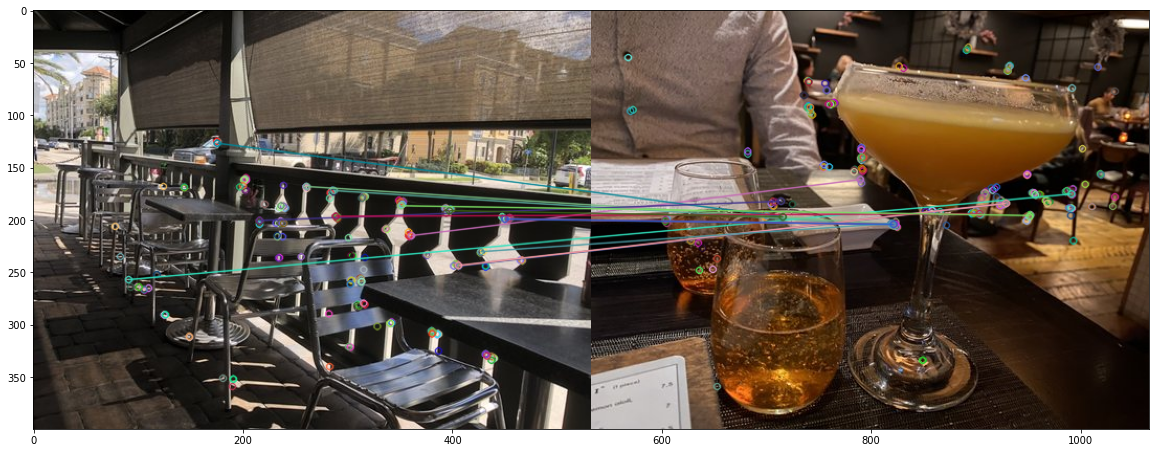

In [ ]:
import random
from sklearn.neighbors import NearestNeighbors

# Create a nearest neighbor classifier
nbrs = NearestNeighbors(n_neighbors=2).fit(X_pca)

# Compute the distances between the query image and all images
distances, indices = nbrs.kneighbors(X_pca)

# Choice of the 
query_index = random.randint(0, len(photos_features_df) - 1)
print("photo N° : " + query_index)
nn_index = indices[query_index][1]

query_photo = photos_features_df.iloc[query_index]
query_img_path = os.path.join(
    ROOT_DIR + "data/photos_dev/", query_photo["file_name"] + ".jpg"
)
query_img = cv.cvtColor(
    cv.imread(query_img_path, flags=cv.IMREAD_COLOR), cv.COLOR_BGR2RGB
)
query_pred_proba = knn.predict_proba(X_pca[query_index].reshape(1, -1))
query_pred = knn.predict(X_pca[query_index].reshape(1, -1))[0]
query_true = y[query_index]

print("-------------------------------------------------------------------------")

if query_true == query_pred:
    print(f"✅ Prediction correct: {query_pred}")
else:
    print(f"❌ Prediction incorrect: {query_pred} (pred) vs. {query_true} (true)")

print(
    f"Image predicted labels:\n{pd.DataFrame(query_pred_proba, columns=knn.classes_)}"
)

print("-------------------------------------------------------------------------")

nn_photo = photos_features_df.iloc[nn_index]
nn_img_path = os.path.join(ROOT_DIR + "data/photos_dev/", nn_photo["file_name"] + ".jpg" )
nn_img = cv.cvtColor(cv.imread(nn_img_path, flags=cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
nn_pred_proba = knn.predict_proba(X_pca[nn_index].reshape(1, -1))
nn_pred = knn.predict(X_pca[nn_index].reshape(1, -1))[0]
nn_true = y[nn_index]

if nn_true == nn_pred:
    print(f"✅ Nearest image prediction correct: {nn_pred}")
else:
    print(f"❌ Nearest image prediction incorrect: {nn_pred} (pred) vs. {nn_true} (true)")

print( f"Nearest image predicted labels:\n{pd.DataFrame(nn_pred_proba, columns=knn.classes_)}")

print("-------------------------------------------------------------------------")

if query_true == nn_true:
    print(f"✅ Query image and nearest image have same label: {query_true}")
else:
    print(f"❌ Query image and nearest image have different labels: {query_true} (query) vs. {nn_true} (nearest)")

print("-------------------------------------------------------------------------")

kp1 = photos_features_df.loc[query_index, "orb_keypoints"]
des1 = photos_features_df.loc[query_index, "orb_descriptors"]
kp2 = photos_features_df.loc[nn_index, "orb_keypoints"]
des2 = photos_features_df.loc[nn_index, "orb_descriptors"]


# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.85 * n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn( query_img, kp1, nn_img, kp2, good, None,)
fig = plt.figure(figsize=(20, 15))
plt.imshow(img3)
plt.show()

## PART II : Transfer Learning for Features extraction

In [ ]:
import pandas as pd
import numpy as np
import random
import logging
import glob
#import os
#import sys

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# matplotlib and plotly for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go

filename = ROOT_DIR  + "data/sampled_photos_df.csv"  

sampled_photos_df =  pd.read_csv(filename )
logger.info(f">>> OK : {len(sampled_photos_df)} photos loaded from JSON file.")

# Reduce memory usage
sampled_photos_df = data_utils.helpers.reduce_dataframe_memory_usage(sampled_photos_df)


### Transfer Learning

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.layers import Dense
from keras import Model

classes = ["drink", "food", "interior", "menu", "outside"]

y_cnn = sampled_photos_df["label"]
X_cnn = []
y_cnn_pred = []

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

photos_features_df = pd.DataFrame()
for photo in sampled_photos_df.itertuples():
  img_path = os.path.join(ROOT_DIR  + "data/photos_dev/", f"{photo.photo_id}.jpg")
  img = load_img(img_path, target_size=(224, 224))  # Charger l'image
  img = img_to_array(img)  # Convertir en tableau numpy
  img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
  img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16

  X_cnn.append(img)

  features_img = model.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

  photos_features_df = photos_features_df.append(
          {
              "file_name": photo.photo_id,
              "label": photo.label,
              "cnn_descriptors": features_img, 
          },
          ignore_index=True,
      )

photos_features_df.dropna(inplace=True)
photos_features_df

58900480/58889256 [==============================] - 0s 0us/step


,file_name,label,cnn_descriptors
0,kMgM6hD2GU-1q79cRP4IWw,outside,[[[[ 0. 0. 0. 0. ...
1,VB75GlozO9ZzkhQC8mY6Ag,menu,[[[[ 0. 0. 0. 0. ...
2,9n5RobGsibyp8IriSszsSQ,menu,[[[[ 0. 0. 0. 0. ...
3,gdbkj2k7jczeLdYwdVBvCA,drink,[[[[0.00000000e+00 0.00000000e+00 0.00000000e+...
4,ukQY-rcV4bHTNXZFcq0I-w,menu,[[[[ 0. 0. 0. 0. ...
...,...,...,...
1245,b3OVp0yKlLKOZiPho_-fAA,outside,[[[[ 0. 0. 0. 0. ...
1246,v-ijwKpgtdAqRLf8-BCTTQ,food,[[[[0.00000000e+00 0.00000000e+00 6.46828461e+...
1247,qXedooX3y7RVx5ufaloyfQ,menu,[[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ...
1248,wq2E-d6NuiCP5_DCC_6e6g,menu,[[[[0.00000000e+00 0.00000000e+00 0.00000000e+...


### Processing of CNN features

Building clusters of CNN features which are close to each other.

In [ ]:
# First, we need to create a dataset of color features.
cnn_features = [
    desc
    for photo_color in photos_features_df["cnn_descriptors"]
      for pc in photo_color
        for d in pc   
          for desc in d 
]
print(np.array(cnn_features).shape)

(61250, 512)


In [ ]:
# Now we need to prepare the color features for clustering, using standard scaling.
from sklearn.preprocessing import StandardScaler

cnn_scaler = StandardScaler().fit(cnn_features)
cnn_features_std = cnn_scaler.transform(cnn_features)

In [ ]:
# Define the hyperparameter : the number of clusters we want to find. 
# For that, we will use the elbow method on the inertia of the clusters.

from sklearn.cluster import KMeans, MiniBatchKMeans

scores = pd.DataFrame(columns=["n_clusters", "inertia"])
for n_clusters in np.logspace(start=1, stop=8, base=2, num=20, dtype=int):
    logger.info(f">>> Clustering with {n_clusters} clusters...")
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42).fit(
        cnn_features_std
    )
    logger.info(f">>> OK : inertia={kmeans.inertia_}")
    scores = scores.append(
        {
            "n_clusters": n_clusters,
            "inertia": kmeans.inertia_,
        },
        ignore_index=True,
    )

# Elbow method to select the best number of clusters
fig = px.line(scores, x="n_clusters", y="inertia", title="Average clusters inertia")
fig.show()

Even with a large number of clusters, the inertia will always be high. This means that the data is very sparse, and the clusters are not very dense.
Anyway, a good number of clusters is around 153.

We can now train our clustering model and count the number of occurrences of each color cluster for each photo. This is the "Bag of visual-words" representation of the photo.

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans

def reshape_cnn_features(features_img):
  cnn_ = [
      desc
      for photo_color in features_img
        for pc in photo_color
          for desc in pc           
  ]
  return cnn_

n_cnn_features = 55
cnn_kmeans = MiniBatchKMeans(n_clusters=n_cnn_features, random_state=42).fit(
    cnn_features_std
)

photos_features_df["cnn_clusters"] = [
    cnn_kmeans.predict(cnn_scaler.transform(reshape_cnn_features(desc)))
    for desc in photos_features_df["cnn_descriptors"]
]

for cluster in range(n_cnn_features):
    photos_features_df[f"cnn_cluster_{cluster}"] = 0

    for i, photo in photos_features_df.iterrows():
        photos_features_df.loc[i, f"cnn_cluster_{cluster}"] = list(
            photos_features_df.loc[i, "cnn_clusters"]
        ).count(cluster)

photos_features_df[
    ["cnn_clusters"] + [f"cnn_cluster_{i}" for i in range(n_cnn_features)]
].head(5)

,cnn_clusters,cnn_cluster_0,cnn_cluster_1,cnn_cluster_2,cnn_cluster_3,cnn_cluster_4,cnn_cluster_5,cnn_cluster_6,cnn_cluster_7,cnn_cluster_8,...,cnn_cluster_45,cnn_cluster_46,cnn_cluster_47,cnn_cluster_48,cnn_cluster_49,cnn_cluster_50,cnn_cluster_51,cnn_cluster_52,cnn_cluster_53,cnn_cluster_54
0,"[27, 27, 27, 27, 27, 27, 9, 14, 14, 14, 14, 27...",0,0,3,0,0,0,0,0,0,...,0,0,2,0,6,0,0,0,0,0
1,"[37, 44, 15, 15, 44, 15, 15, 35, 5, 44, 44, 44...",0,0,0,0,0,1,2,0,0,...,1,0,8,0,0,0,0,0,0,0
2,"[6, 43, 43, 43, 43, 43, 6, 34, 43, 43, 43, 43,...",0,0,0,0,0,2,3,0,0,...,0,0,1,0,0,0,2,0,0,0
3,"[48, 48, 7, 31, 51, 51, 7, 35, 28, 28, 5, 7, 7...",0,1,0,0,0,2,0,11,0,...,0,0,8,4,0,0,2,0,0,0
4,"[51, 47, 47, 44, 47, 44, 51, 44, 19, 19, 44, 4...",1,0,0,0,0,0,0,0,0,...,1,0,5,0,0,0,9,0,0,0


### Data preparation

First, we need to prepare the data for the classification task :
-  split the dataset into training and test sets (`train_test_split`)
-  scale the data (`StandardScaler`)
-  reduce the dimensionality of the data (`PCA`)

In [ ]:
# Training and test sets
# We split the dataset into training and test sets, keeping the labels distribution.

from sklearn.model_selection import train_test_split


X = photos_features_df[
    [f"cnn_cluster_{cluster}" for cluster in range(n_cnn_features)]
    
]
y = photos_features_df["label"]

X_train, X_test, y_train, y_test  = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

#### Scaling

Now, we scale the data to have a mean of 0 and a standard deviation of 1, so that each cluster has the same weight.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

X_std = scaler.transform(X)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Dimensionality reduction

We choose to keep 99% of variance of the data.

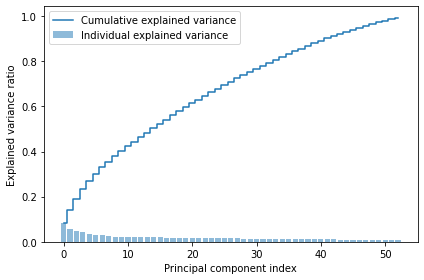

In [ ]:
from sklearn.decomposition import PCA
from sklearn import manifold


# Instantiate PCA
pca = PCA(n_components=0.99)

# Determine transformed features
pca.fit(X_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; 
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(
    range(0, len(exp_var_pca)),
    exp_var_pca,
    alpha=0.5,
    align="center",
    label="Individual explained variance",
)
plt.step(
    range(0, len(cum_sum_eigenvalues)),
    cum_sum_eigenvalues,
    where="mid",
    label="Cumulative explained variance",
)
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
X_pca = pca.transform(X_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(X_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = sampled_photos_df["label_encoded"]
df_tsne["label"] = sampled_photos_df["label"]
print(df_tsne.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(1250, 4)


## Analyse visuelle : affichage T-SNE selon catégories d'images

* Les catégories  et  sont partiellement séparées

In [ ]:
import plotly.express as px
from sklearn import metrics

fig = px.scatter(df_tsne, x="tsne1", y="tsne2", color="label", symbol="label",
                 width=1500, height=1000)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()

###  Calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.64 reste faible

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

knn = KNeighborsClassifier().fit(X_train_pca, y_train)

y_train_pred = knn.predict(X_train_pca)

print("ARI : ", metrics.adjusted_rand_score(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))
plot_confusion_matrix(knn, X_train_pca, y_train)

ARI :  0.6368983033276893


## Page Web de presentation


In [ ]:
!pip install voila
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 346 kB 73.8 MB/s 
     |████████████████████████████████| 70 kB 7.5 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 563 kB 65.2 MB/s 
     |████████████████████████████████| 112 kB 74.2 MB/s 
     |████████████████████████████████| 423 kB 72.9 MB/s 
     |████████████████████████████████| 80 kB 8.1 MB/s 
     |████████████████████████████████| 60 kB 7.1 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 133 kB 74.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jinja2
    Found existing installation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 4.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=e66b17c61fed2e8c81fc70b3f228303fa91a9bd8632e649b1ad9278f1b3f2dc8
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok config add-authtoken 2GHX2BiBJQWCm0zp6xAldBMgEYw_7ZYPixwCvkXv58qDVxcEx

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [ ]:
from pyngrok import ngrok

# Open a HTTP tunnel on the default port 80
! ngrok authtoken 2GHX2BiBJQWCm0zp6xAldBMgEYw_7ZYPixwCvkXv58qDVxcEx
#!ngrok http https://localhost
#public_url = ngrok.connect(port = '80')

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
public_url = ngrok.connect(port = '80')

In [ ]:
voila --no-browser --strip_sources=False KOUASSI_Melissa_4_presentation_102022.ipynb

SyntaxError: ignored

In [ ]:
public_url

<NgrokTunnel: "http://89b0-35-229-214-109.ngrok.io" -> "http://localhost:80">

In [ ]:
voila --no-browser KOUASSI_Melissa_4_presentation_102022.ipynb

SyntaxError: ignored